In [1]:
from google.colab import drive
drive.mount("/content/gdrive")  
!pwd  # show current path 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [2]:
%cd "/content/gdrive/MyDrive/a01369984_IA/DP/"
!ls  # show current directory

/content/gdrive/MyDrive/a01369984_IA/DP
DogBreeds.h5  images  images_test  img	img_test  Mexican_hairless


In [3]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import optimizers, layers
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
print(os.listdir("/content/gdrive/My Drive/a01369984_IA/DP"))

['images', 'images_test', 'img', 'img_test', 'Mexican_hairless', 'DogBreeds.h5']


Dataset

https://www.kaggle.com/datasets/jessicali9530/stanford-dogs-dataset?datasetId=119698&sortBy=voteCount

In [5]:
img = ("/content/gdrive/My Drive/a01369984_IA/DP/img")
test = ("/content/gdrive/My Drive/a01369984_IA/DP/img_test")

In [6]:
datagen = ImageDataGenerator(
							rescale = 1./255,
       				validation_split=0.20)

train = datagen.flow_from_directory(
							img,
							target_size = (224, 224),
							batch_size = 20,
							class_mode ='categorical',
              subset="training")

val = datagen.flow_from_directory(
							img,
							target_size = (224,224),
							batch_size =20,
							class_mode= 'categorical',
              subset="validation")

steps_size_train = train.n//train.batch_size
steps_size_val = val.n//val.batch_size

Found 410 images belonging to 3 classes.
Found 101 images belonging to 3 classes.


Modelo

In [7]:
model = Sequential([
        Conv2D(32, (3,3), activation="relu", input_shape=(224,224,3)),
        MaxPooling2D(),
        Conv2D(64, (3,3), activation="relu", input_shape=(224,224,3)),
        MaxPooling2D(),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')
    ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 32)                5

In [9]:
optimizer = optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer=optimizer, loss='categorical_crossentropy',
                           metrics=["accuracy"])

Entrenamiento

In [10]:
hist = model.fit(train, 
				steps_per_epoch = steps_size_train,  
				epochs = 10, 
				validation_data = val, 
				validation_steps = steps_size_val)

Epoch 1/10
20/20 [==============================] - 14s 435ms/step - loss: 15.1792 - accuracy: 0.3333 - val_loss: 1.0976 - val_accuracy: 0.3500
Epoch 2/10
20/20 [==============================] - 5s 248ms/step - loss: 1.0971 - accuracy: 0.3667 - val_loss: 1.0969 - val_accuracy: 0.3600
Epoch 3/10
20/20 [==============================] - 4s 197ms/step - loss: 1.0979 - accuracy: 0.3538 - val_loss: 1.0976 - val_accuracy: 0.3500
Epoch 4/10
20/20 [==============================] - 4s 202ms/step - loss: 1.0976 - accuracy: 0.3590 - val_loss: 1.0977 - val_accuracy: 0.3500
Epoch 5/10
20/20 [==============================] - 4s 197ms/step - loss: 1.0978 - accuracy: 0.3564 - val_loss: 1.0963 - val_accuracy: 0.3600
Epoch 6/10
20/20 [==============================] - 4s 201ms/step - loss: 1.0977 - accuracy: 0.3564 - val_loss: 1.0960 - val_accuracy: 0.3600
Epoch 7/10
20/20 [==============================] - 4s 200ms/step - loss: 1.0979 - accuracy: 0.3513 - val_loss: 1.0975 - val_accuracy: 0.3500
Epoc

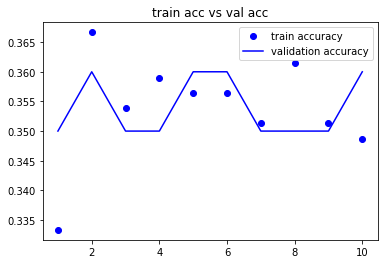

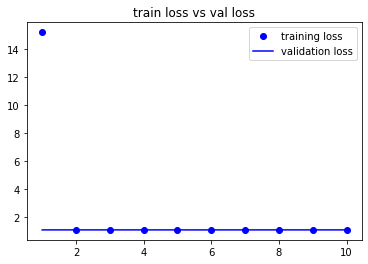

In [11]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.plot(epochs,val_acc, 'b', label='validation accuracy')
plt.title('train acc vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.plot(epochs,val_loss, 'b', label = 'validation loss')
plt.title('train loss vs val loss')
plt.legend()

plt.show()

In [12]:
test_gen = ImageDataGenerator(1./255)

testset = test_gen.flow_from_directory(
					test,
					target_size = (224, 224),
					batch_size = 20,
          class_mode ='categorical')

steps_size_test = testset.n//testset.batch_size

Found 50 images belonging to 3 classes.


In [13]:
test_loss, test_acc = model.evaluate(testset, steps = steps_size_test)
print('\ntest acc :\n', test_acc)

/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


2/2 [==============================] - 19s 18s/step - loss: 12.1514 - accuracy: 0.2750

test acc :
 0.2750000059604645


In [15]:
#model.save('DogBreeds.h5')